### Цели:
<ol>
<li>исследование опыта известных платформ и игр</li>
<li>поиск перспективных платформ, жанров и рынков для нового проекта</li>    
<li>проверка гипотез</li>

Если предположить, что более современная и технологичная PlayStation3 отличается от PlayStation2, то их средний пользовательский рейтинг должен отличаться - нулевая гипотеза: средний пользовательский рейтинг платформ PS2 и PS3 одинаковый.<br>
Если предположить, что игры разных жанров имеют различную популярность пользователей, то их средний пользовательский рейтинг должен отличаться - нулевая гипотеза: средний пользовательский рейтинг жанров Action и Sports не различается.

### Шаг 1. Открываю файлы с данными и изучаю общую информацию

In [10]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [11]:
df = pd.read_csv('./datasets/games.csv')

In [12]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [13]:
df.sample()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
285,Super Mario World 2: Yoshi's Island,SNES,1995.0,Platform,1.65,0.61,1.76,0.09,NaN,NaN,NaN


In [14]:
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Формат `object` в столбце `User_Score`, float в `Year_of_Release`. Попробую изменить на следующем шаге

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Шаг 2. Подготовка данных

Переименование столбцов. Перевожу имена в нижний регистр

In [16]:
df.set_axis(df.columns.str.lower(), axis='columns', inplace=True)

In [17]:
df = df.rename(columns = {'year_of_release':'year'})

Создаю новый столбец `total_sales` c данными о количестве продаж во всех регионах

In [19]:
df.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [21]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Проверка пропусков

In [22]:
df.isnull().sum()

name               2
platform           0
year             269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      6701
rating          6766
total_sales        0
dtype: int64

Пропуски в столбце `name`. Две строки в которых много пропущенных значений в других столбцах. Оставляю их.

In [24]:
df.query('name != name')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


Пропуски в `year`. Пропуски невозможно заполнить. В строках с пропусками важные данные и их относительно много. Для маркировки заполню их значением 1970.

In [25]:
df.query('year != year')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,2.33
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T,2.24
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09


In [26]:
df['year'] = df['year'].fillna(1970)

Пропуски в `critic_score`

In [27]:
df['critic_score'].isnull().sum()

8578

In [28]:
df.query('critic_score != critic_score').head(20)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,23.09
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,20.62
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,18.24
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,18.14
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,17.28


Около половины значений пропущенно. Попробую заполнить пропуски средним значением сгруппированным по платформе и жанру.

In [29]:
grouped = df.groupby(['platform', 'genre'])['critic_score'].mean()

In [30]:
df = df.merge(grouped, on=['platform', 'genre'], how='left', suffixes=('', '_mean'))

In [31]:
df.loc[df['critic_score'].isnull(), 'critic_score'] = \
df.loc[df['critic_score'].isnull(), 'critic_score_mean']

Удалось заполнить 87% пропусков. Остальные оставляю, потому что строки с пропусками содержат важные данные и их количество значительно.

In [32]:
df['critic_score'].isnull().sum()

1134

Пропуски в `user_score`

In [33]:
df['user_score'].isnull().sum()

6701

`tbd` - аббревиатура от to be determined и означает, что количество оценок недостаточно и пока не отображается. Для маркировки поменяю значение `tbd` на -1.

In [34]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7       220
7.6     220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
7.2     167
8.9     153
6.6     148
6.9     143
6.3     138
6.7     128
6       127
6.5     125
9       120
6.2     113
       ... 
2.5      12
2        11
9.4      11
2.4      11
1.7       9
2.9       9
2.1       9
2.7       8
2.2       6
9.5       6
1.8       6
1.4       5
2.6       4
1.6       3
1.2       3
1.9       2
0.2       2
0.3       2
9.6       2
2.3       2
1.5       2
1         2
1.1       2
0.7       2
0.5       2
1.3       2
0.9       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [35]:
df['user_score'] = df['user_score'].replace('tbd','-1')

Меняю тип столбца на `float`

In [36]:
df['user_score'] = df['user_score'].astype('float')

Около 40% значений пропущенно. Попробую заполнить пропуски средним значением сгруппированным по платформе и жанру.

In [37]:
grouped = df.query('user_score >= 0').groupby(['platform', 'genre'])['user_score'].mean()

In [38]:
df = df.merge(grouped, on=['platform', 'genre'], how='left', suffixes=('', '_mean'))

In [39]:
df.loc[df['user_score'].isnull(), 'user_score'] = \
df.loc[df['user_score'].isnull(), 'user_score_mean']

Удалось заполнить 83% пропусков. Остальные оставляю, потому что строки с пропусками содержат важные данные и их количество значительно.

In [40]:
df['user_score'].isnull().sum()

1127

Приведите данные к нужным типам

В столбце `year` меняю тип данных на `int`

In [41]:
df['year'] = df['year'].astype('int')

### Шаг 3. Провожу исследовательский анализ данных

Функция для расчета среднего, медианы и стандартного отклонения для значений определенного столбца датафрейма.

In [42]:
def metrics(data, column):
    print('Среднее:', data[column].mean())
    print('Медиана:', data[column].median())
    print('Стандартное отклонение:', data[column].std())

#### 1) Распределение игр по годам релиза

Группирую игры по годам релиза. Меняю тип данных столбца `year` на `int`

In [43]:
year = df.query('year > 1970').groupby('year')['name'].count().reset_index()
year = year.rename(columns={'name': 'count'})
year['year'] = year['year'].astype('int')

Построение графиков боксплот и гистограммы.

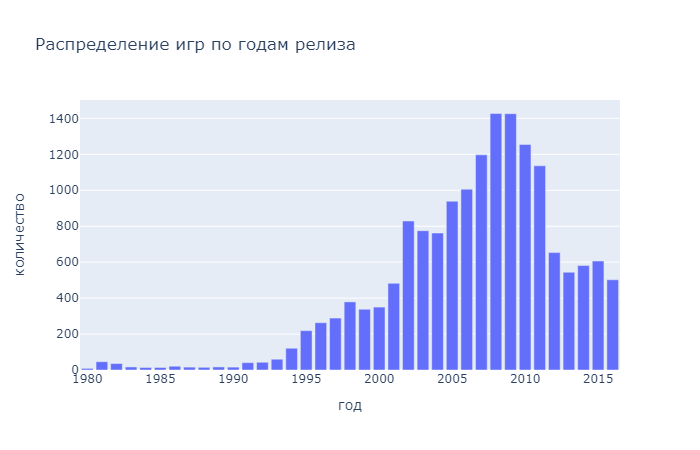

In [45]:
data = go.Bar(x=year['year'], y=year['count'])
layout = {'title': 'Распределение игр по годам релиза', \
          'xaxis': {'title': 'год'}, \
          'yaxis': {'title': 'количество'}}
fig = go.Figure(data=data, layout=layout)
#iplot(fig, show_link=False)
fig.show('png')

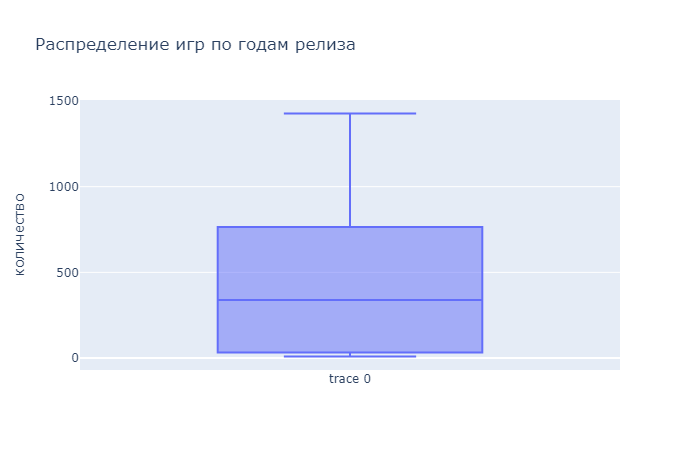

In [46]:
layout = {'title': 'Распределение игр по годам релиза', \
          'yaxis': {'title': 'количество'}}
fig = go.Figure(layout=layout)
fig.add_trace(go.Box(y=year['count']))
fig.show('png')

Распределение выборки отличается от нормального. Среднее составляет 444, медиана 338, стандартное отклонение 451. Медиана смещена в сторону первого квартиля - данные скошены вправо.

In [47]:
metrics(year, 'count')

Среднее: 444.43243243243245
Медиана: 338.0
Стандартное отклонение: 451.60433398548616


#### 2) Распределение по годам релиза для игр с отзывом и без отзыва

Создаю датафрейм `no_score` с играми без отзывов, сгруппированный по годам релиза.

In [49]:
no_score = df.query('user_score != user_score and critic_score != critic_score and year > 1970') \
             .groupby('year')['name'] \
             .count() \
             .reset_index()
no_score['year'] = no_score['year'].astype('int')

Создаю датафрейм `score` с играми у которых есть отзыв от пользователей и/или от критиков, сгруппированный по годам релиза.

In [61]:
score = df.query('(user_score == user_score or critic_score == critic_score) and year > 1970') \
          .groupby('year')['name'] \
          .count() \
          .reset_index()
score['year'] = score['year'].astype('int')

Построение графиков боксплот и гистограммы.

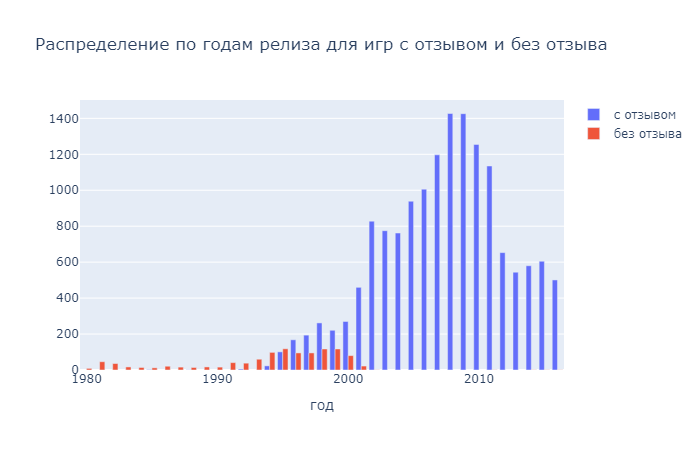

In [62]:
trace0 = go.Bar(x=score['year'], y=score['name'],name='с отзывом')
trace1 = go.Bar(x=no_score['year'], y=no_score['name'], name='без отзыва')
data = [trace0, trace1]
layout = {'title': 'Распределение по годам релиза для игр с отзывом и без отзыва', \
          'xaxis': {'title': 'год'}}
fig = go.Figure(data=data, layout=layout)
#iplot(fig, show_link=False)
fig.show('png')

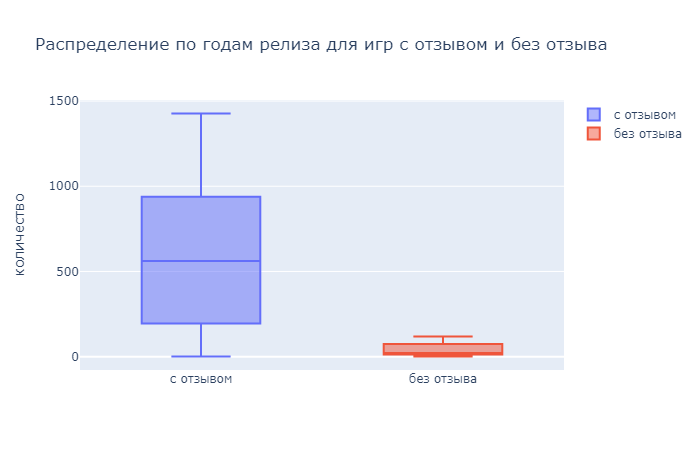

In [63]:
trace0 = go.Box(y=score['name'],name='с отзывом')
trace1 = go.Box(y=no_score['name'],name='без отзыва')
data = [trace0, trace1]
layout = {'title': 'Распределение по годам релиза для игр с отзывом и без отзыва', \
          'yaxis': {'title': 'количество'}}
fig = go.Figure(data=data, layout=layout)
#iplot(fig, show_link=False)
fig.show('png')

Обе выборки не распределены нормально. В выборке с отзывами больше значения метрик локации - среднее 590, медиана 562, стандартное отклонение 457, против 40, 21 и 40 соответственно. 

In [64]:
metrics(score, 'name')

Среднее: 590.0
Медиана: 562.0
Стандартное отклонение: 457.39479664727276


In [65]:
metrics(no_score, 'name')

Среднее: 40.888888888888886
Медиана: 21.0
Стандартное отклонение: 40.662147710250835


#### 3) График продаж по каждому году

До 1995 года был медленный рост до 100 млн. Далее резкий рост до 2008 года на уровне 670 млн. и резкое падение. Наибольший рост показали североамериканский и европейский рынки.

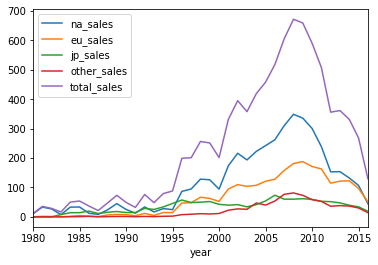

In [67]:
year_sales = df.query('year > 1970')[[x for x in df.columns if 'sales' in x] + ['year']]
year_sales.groupby('year').sum().plot()

#### 4) Ящик с усами по глобальным продажам

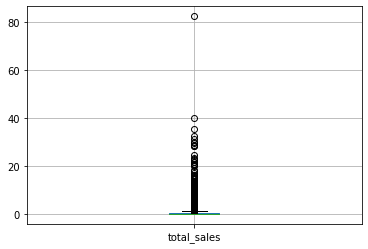

In [68]:
df.boxplot('total_sales')

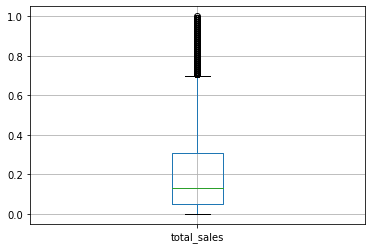

In [69]:
df.query('total_sales < 1').boxplot('total_sales')

Только около 12% игр имеют глобальные продажи свыше 1 млн. В остальной части выборки медианное значение составляет 0.13 млн.

In [70]:
len(df.query('total_sales > 1'))

2061

In [71]:
len(df)

16715

In [72]:
df.query('total_sales < 1')['total_sales'].median()

0.13

#### 5) На какой платформе было выпущено больше всего игр

Больше всего игр выпущенно для PS2 - 2161 игра.

In [73]:
df['platform'].value_counts().head()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
Name: platform, dtype: int64

#### 6) Игр какого жанра больше всего

Больше всего игр жанра action - 3369 игр

In [74]:
df['genre'].value_counts().head()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Name: genre, dtype: int64

#### 7) Игры с наибольшей и наименьшей оценкой от пользователей

Максимальную пользовательскую оценку в `9.7` баллов получила игра Breath of Fire III

In [75]:
df.query('user_score >= 0')[df['user_score'] == df['user_score'].max()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,critic_score_mean,user_score_mean
14412,Breath of Fire III,PSP,2005,Role-Playing,0.0,0.02,0.0,0.01,68.728571,9.7,T,0.03,68.728571,7.472603


Минимальную пользовательскую оценку в `0` баллов получила игра `My Little Pony: Pinkie Pie's Party`

In [76]:
df.query('user_score >= 0')[df['user_score'] == df.query('user_score >= 0')['user_score'].min()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,critic_score_mean,user_score_mean
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,61.372881,0.0,E,0.72,61.372881,6.804878


#### 8) Игры с наибольшей и наименьшей оценкой от критиков

Наибольшую оценку критиков в `98` баллов получили игры `Grand Theft Auto IV`, `Tony Hawk's Pro Skater 2` и `SoulCalibur`

In [77]:
df[df['critic_score'] == df['critic_score'].max()]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,critic_score_mean,user_score_mean
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00,67.118367,6.844195
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50,69.024896,6.917045
227,Tony Hawk's Pro Skater 2,PS,2000,Sports,3.05,1.41,0.02,0.20,98.0,7.7,T,4.68,73.645161,8.087500
5350,SoulCalibur,DC,1999,Fighting,0.00,0.00,0.34,0.00,98.0,8.8,T,0.34,89.000000,8.900000


Наименьшую оценку критиков в `13` баллов получила игра `Ride to Hell`

In [78]:
df[df['critic_score'] == df['critic_score'].min()]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,critic_score_mean,user_score_mean
13689,Ride to Hell,PS3,2013,Racing,0.02,0.01,0.0,0.01,13.0,1.0,M,0.04,71.865672,6.471642


#### 9) Корреляция между оценками критиков и пользовательскими оценками

`0.36` - значимая корреляция отсутствует

In [79]:
df['critic_score'].corr(df['user_score'])

0.36740091475947

### Шаг 4. Портрет пользователя для каждого региона

Список регионов - Северная Америка, Европа и Япония

In [80]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

#### 1) Топ-5 предпочтительных жанров

In [81]:
for i in regions:
    print(df.pivot_table(index = 'genre', values = i, aggfunc = 'sum') \
            .sort_values(i, ascending = False).head())

          na_sales
genre             
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
         eu_sales
genre            
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
              jp_sales
genre                 
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11


#### 2) В какие года пользователи были наиболее активны (больше всего покупали игры)?

In [82]:
for i in regions:
    print(df.pivot_table(index = 'year', values = i, aggfunc = 'sum') \
            .sort_values(i, ascending = False).head(1))

      na_sales
year          
2008    348.69
      eu_sales
year          
2009    187.94
      jp_sales
year          
2006     73.74


#### 3) Топ-5 предпочтительных платформ

In [83]:
for i in regions:
    print(df.pivot_table(index = 'platform', values = i, aggfunc = 'sum') \
            .sort_values(i, ascending = False).head())

          na_sales
platform          
X360        602.47
PS2         583.84
Wii         496.90
PS3         393.49
DS          382.40
          eu_sales
platform          
PS2         339.29
PS3         330.29
X360        270.76
Wii         262.21
PS          213.61
          jp_sales
platform          
DS          175.57
PS          139.82
PS2         139.20
SNES        116.55
3DS         100.67


#### 4) Какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)?

Группирую рейтинги по доходам в каждом регионе. Везде преобладает рейтинг `E` - для всех

In [84]:
for i in regions:
    print(df.pivot_table(index = 'rating', values=i, aggfunc = 'sum') \
            .sort_values(i, ascending = False).head(1))

        na_sales
rating          
E        1292.99
        eu_sales
rating          
E         710.25
        jp_sales
rating          
E         198.11


### Шаг 5. Проверка гипотез

#### 1) Гипотеза: средний пользовательский рейтинг платформ PS2 и PS3 одинаковый

Нулевая гипотеза формулируется как равенство. Альтернативная гипотеза - как различие.

Нулевая гипотеза: средний пользовательский рейтинг платформ PS2 и PS3 не отличается<br>
Альтернативная гипотеза: средний пользовательский рейтинг платформ PS2 и PS3 отличается       

Создаю датафреймы для каждой платформы

In [85]:
ps2 = df.query('platform == "PS2" and user_score >= 0')['user_score']

In [86]:
ps3 = df.query('platform == "PS3" and user_score >= 0')['user_score']

Проверяю распределение

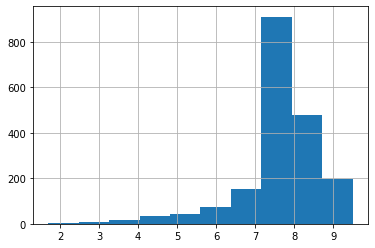

In [87]:
ps2.hist()

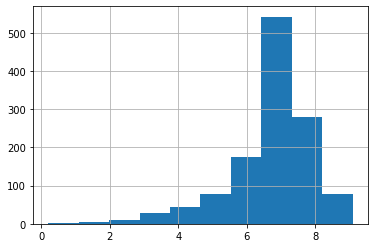

In [88]:
ps3.hist()

Данные не распределены нормально, поэтому использую U-критерий Манна-Уитни

In [89]:
alpha = 0.05 #критический уровень статистической значимости
results = stats.mannwhitneyu(ps2, ps3)
print('p-значение:', results.pvalue)  #уровень значимости
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 2.2157614796704275e-116
Отвергаем нулевую гипотезу


Нулевая гипотеза была отвергнута. Есть основания полагать, что средний пользовательский рейтинг платформ PS2 и PS3 различаются.

#### 2) Гипотеза: средний пользовательский рейтинг жанров Action и Sports различается

Нулевая гипотеза формулируется как равенство. Альтернативная гипотеза - как различие.

Нулевая гипотеза: средний пользовательский рейтинг жанров Action и Sports не отличается<br>
Альтернативная гипотеза: ссредний пользовательский рейтинг жанров Action и Sports отличается       

Создаю датафреймы для каждого из жанров

In [90]:
action = df.query('genre == "Action" and user_score >= 0')['user_score']

In [91]:
sports = df.query('genre == "Sports" and user_score >= 0')['user_score']

Проверяю распределение

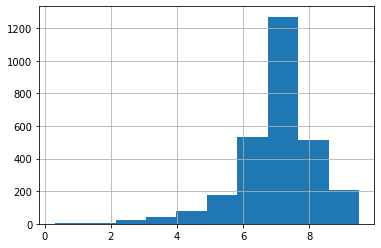

In [92]:
action.hist()

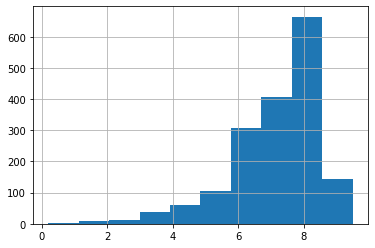

In [93]:
sports.hist()

Данные не распределены нормально, поэтому использую U-критерий Манна-Уитни

In [94]:
alpha = 0.05 #критический уровень статистической значимости
results = stats.mannwhitneyu(action, sports)
print('p-значение:', results.pvalue)  #уровень значимости
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 9.233021709826122e-07
Отвергаем нулевую гипотезу


Нулевая гипотеза была отвергнута. Есть основания полагать, что средний пользовательский рейтинг жанров Action и Sports различается.

### Шаг 5. Общий вывод

#### Предобработка:
- 87% пропусков в столбце `ctitic_score` и 83% пропусков в столбце `user_score` заполнены средним значением сгруппированным по платформе и жанру. Это может оказать влияние на результаты.
#### Исследование:
- Проведено исследование опыта известных платформ и игр. Наиболее перспективным жанром является `Action`. Выручка от игр данного жанра составила 1744 млн. или около 20% всей выручки. 
- Наиболее перспективный региональный рынок - Северная Америка. Выручка от пользователей этого региона составила 4402 млн. или около 50% всей выручки. 
- В каждом регионе преобладает рейтинг `E` - игры для всех.
- Проведена проверка гипотезы о том, что средний пользовательский рейтинг платформ PS2 и PS3 различается. По результатам можно сделать вывод, что средняя пользовательский рейтинг по платформам скорее различается.
- Проведена проверка гипотезы о том, что средний пользовательский рейтинг жанров Action и Sports различается. По результатам можно сделать вывод, что средний пользовательский рейтинг по жанрам скорее различается.